In [2]:
import pandas as pd
import xlrd
from matplotlib import pyplot as plt
from matplotlib_venn import *

In [9]:
#enter Excel File name in format 'VennDiagram.xlsx'
Venn = pd.ExcelFile('VennDiagram.xlsx')

#Enter Sheet name ex: 'Sheet1'
df = Venn.parse()
colnames = []
for i in range(len(df.columns.values)):
    colnames.append(str(df.columns.values[i]))
colnames


['Botox', 'Botulinum Toxin', 'Dysport']

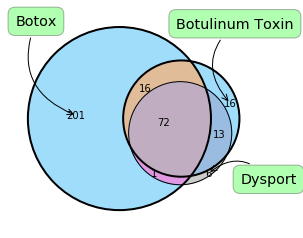

In [10]:
from matplotlib import pyplot as plt
from matplotlib_venn import *

#If data has 3 sets to compare
if len(colnames) == 3:
    one = list(df[colnames[0]])
    one_total = 0
    two = list(df[colnames[1]])
    two_total = 0
    three = list(df[colnames[2]])
    three_total = 0
    one_two = []
    one_three = []
    two_three = []
    one_two_three = []

    for i in range(len(one)):
        if one[i] == 1 and two[i] == 1 and three[i] == 0:
            one_two.append(1)
        else:
            one_two.append(0)
        
        if one[i] == 1 and three[i] == 1 and two[i] == 0:
            one_three.append(1)
        else:
            one_three.append(0)
        
        if two[i] == 1 and three[i] == 1 and one[i] == 0:
            two_three.append(1)
        else:
            two_three.append(0)
        
        if  one[i] == 1 and two[i] == 1 and three[i] == 1:
            one_two_three.append(1)
        else:
            one_two_three.append(0)
        
        if one[i] == 1 and two[i] == 0 and three[i] == 0:
            one_total += 1
        elif one[i] == 0 and two[i] == 1 and three[i] == 0:
            two_total += 1
        elif one[i] == 0 and two[i] == 0 and three[i] == 1:
            three_total += 1
    
    one_two_total = sum(one_two)
    one_three_total = sum(one_three)
    two_three_total = sum(two_three)
    one_two_three_total = sum(one_two_three)
    
    s = (
    one_total,    
    two_total,   
    one_two_total,    
    three_total,    
    one_three_total,    
    two_three_total,  
    one_two_three_total,
    )
    v = venn3(subsets=s, set_labels=('', '', ''))
    
    #Change color pallette of different Venn Diagram regions here
    v.get_patch_by_id('100').set_color('#10abf3')
    v.get_patch_by_id('010').set_color('')
    v.get_patch_by_id('001').set_color('grey')
#     v.get_patch_by_id('110').set_color('#c41230')
#     v.get_patch_by_id('101').set_color('#ffcc2d')
    
    c = venn3_circles(subsets=s, linestyle='solid')
    c[0].set_ls('solid')  # Line style
    c[1].set_ls('solid')
    c[2].set_lw(1.0)
    
    plt.annotate(colnames[2], xy = v.get_label_by_id('001').get_position(), xytext = (60,-10), size = 'x-large',
            ha = 'center', textcoords = 'offset points', bbox = dict(boxstyle = 'round, pad = 0.5', fc = 'lime', alpha = 0.3),
            arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3, rad = 0.5', color = 'black'))
    
    plt.annotate(colnames[0], xy = v.get_label_by_id('100').get_position(), xytext = (-40,90), size = 'x-large',
            ha = 'center', textcoords = 'offset points', bbox = dict(boxstyle = 'round, pad = 0.5', fc = 'lime', alpha = 0.3), arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3, rad = 0.5', color = 'black'))

    plt.annotate(colnames[1], xy = v.get_label_by_id('010').get_position(), xytext = (5,75), size = 'x-large',
            ha = 'center', textcoords = 'offset points', bbox = dict(boxstyle = 'round, pad = 0.5', fc = 'lime', alpha = 0.3),
            arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3, rad = 0.5', color = 'black'))
    
    plt.show()
    
elif len(colnames) == 2:
    one = list(df[colnames[0]])
    one_total = 0
    two = list(df[colnames[1]])
    two_total = 0
    one_two = []
    for i in range(len(one)):
        if one[i] == 1 and two[i] == 1:
            one_two.append(1)
        else:
            one_two.append(0)
        if one[i] == 1 and two[i] == 0:
            one_total += 1
        elif one[i] == 0 and two[i] == 1:
            two_total += 1
        
    one_two_total = sum(one_two)
    s = (
    one_total,    # Botox
    two_total,    # Botox_Dysport
    one_two_total,    # Botulinum_Dysport
    )
    v = venn2(subsets=s, set_labels=('', ''))
    v.get_patch_by_id('100').set_color('#ff620a')
    v.get_patch_by_id('010').set_color('#10abf3')
    v.get_patch_by_id('110').set_color('grey')
    c = venn2_circles(subsets=s, linestyle='solid')
    c[0].set_ls('solid')  # Line style
    c[1].set_ls('solid')
    
    plt.annotate(colnames[0], xy = v.get_label_by_id('100').get_position(), xytext = (-40,90), size = 'x-large',
            ha = 'center', textcoords = 'offset points', bbox = dict(boxstyle = 'round, pad = 0.5', fc = 'lime', alpha = 0.3), arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3, rad = 0.5', color = 'black'))
    
    plt.annotate(colnames[1], xy = v.get_label_by_id('010').get_position(), xytext = (5,75), size = 'x-large',
            ha = 'center', textcoords = 'offset points', bbox = dict(boxstyle = 'round, pad = 0.5', fc = 'lime', alpha = 0.3),
            arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3, rad = 0.5', color = 'black'))

    plt.show()
    

In [ ]:
# from pandas import ExcelWriter
# Output = pd.DataFrame({'Botox': Botox, 'Botulinum Toxin': Botulinum, 'Dysport': Dysport, 'Botox and Botulinum Toxin': Botox_Botulinum, 'Botox and Dysport': Botox_Dysport, 'Botulinum and Dysport': Botulinum_Dysport})
# writer = ExcelWriter('PythonExport1.xlsx')
# Output.to_excel(writer,'Sheet5')

# writer.save()